In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Algerian_Forest_Fires_cleaned_dataset.csv')

In [3]:
data = data.drop(['day','month','year'],axis = 1)

In [4]:
data['Classes'] = np.where(data['Classes'].str.contains('not fire'),0,1)

In [5]:
X = data.drop('FWI',axis = 1)
Y = data['FWI']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 42) 

In [7]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [8]:
corr_features = correlation(X_train,0.85)

In [9]:
X_train.drop(corr_features,axis = 1, inplace = True)
X_test.drop(corr_features,axis = 1, inplace = True)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Mean absolute erro 0.5642305340105683
R2 Score 0.9842993364555513


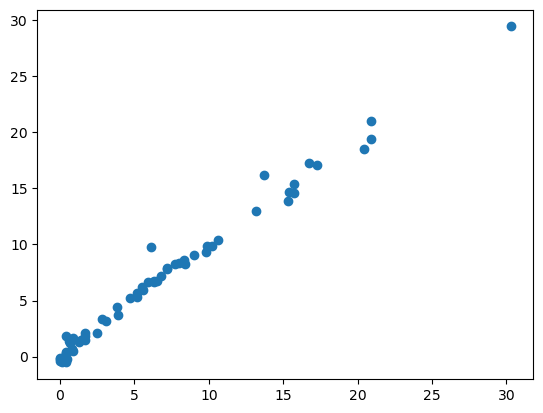

In [11]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Ridgereg = Ridge()
Ridgereg.fit(X_train_scaled,y_train)
y_pred = Ridgereg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute erro', mae)
print('R2 Score',score)
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(Ridgeregopen('ridge.pkl','wb')